<a href="https://colab.research.google.com/github/Anish32/traffic-prediction/blob/main/traffic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install xgboost
!pip install opencv-python
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [18]:
df=pd.read_csv('/content/RTA Dataset.csv')

In [19]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [21]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [22]:
df.shape

(12316, 32)

In [23]:
df['Accident_severity'].value_counts()

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


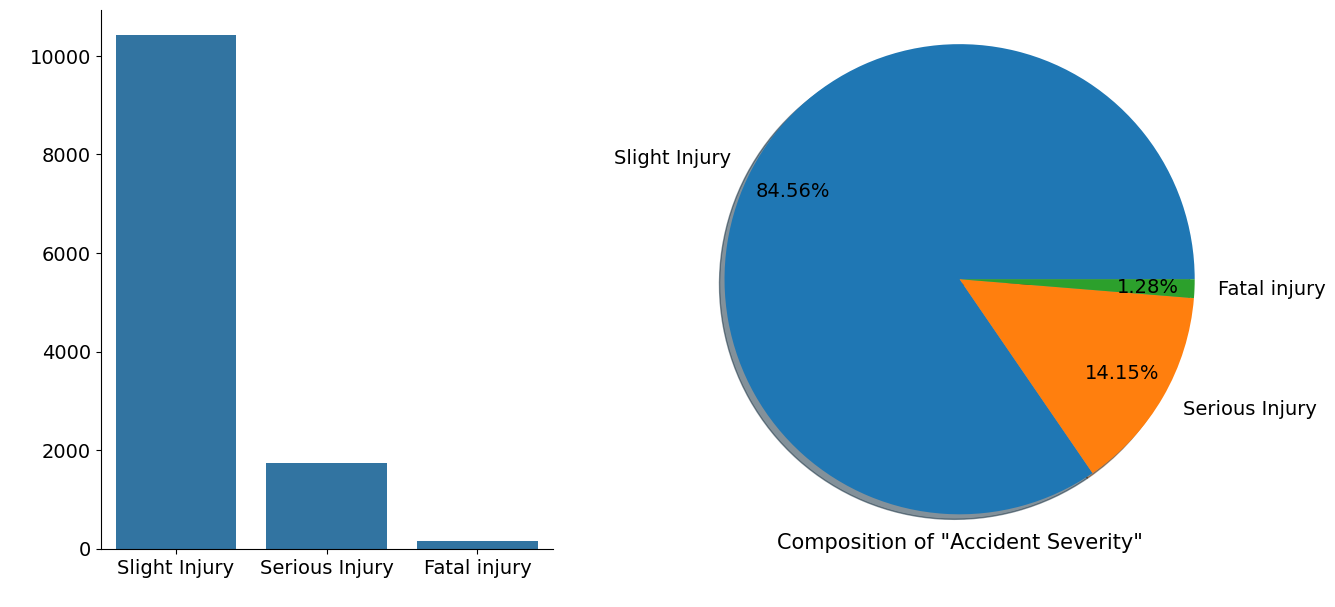

In [24]:
plt.figure(figsize=(14,7))
# barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x=df["Accident_severity"])
ax1.set_xlabel(" ")
ax1.set_ylabel(" ")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True, right=True)
# pieplot
ax2 = plt.subplot(1,2,2)

# Get the values and labels for the pie chart
values = df["Accident_severity"].value_counts().values
labels = df["Accident_severity"].value_counts().index  # Use index for labels

plt.pie(values,  # Use values here
        labels=labels,  # Use labels here
        autopct='%1.2f%%',
        pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14}
       )
ax2.set_xlabel(" ")
plt.xlabel('Composition of "Accident Severity"', fontsize=15, labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

In [25]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Number_of_vehicles_involved,12316.0,2.040679,0.688790,1.0,2.0,2.0,2.0,7.0
Number_of_casualties,12316.0,1.548149,1.007179,1.0,1.0,1.0,2.0,8.0


In [27]:
df['Cause_of_accident'].value_counts()

,count
Cause_of_accident,
No distancing,2263
Changing lane to the right,1808
Changing lane to the left,1473
Driving carelessly,1402
No priority to vehicle,1207
Moving Backward,1137
No priority to pedestrian,721
Other,456
Overtaking,430


In [28]:
df['Number_of_vehicles_involved'].value_counts()

,count
Number_of_vehicles_involved,
2,8340
1,1996
3,1568
4,363
6,42
7,7


In [29]:
df['Accident_severity'].value_counts()

,count
Accident_severity,
Slight Injury,10415
Serious Injury,1743
Fatal injury,158


In [30]:
df.drop(['Service_year_of_vehicle','Defect_of_vehicle', 'Work_of_casuality', 'Fitness_of_casuality'], axis = 1, inplace = True)

In [31]:
df['hour'] = pd.to_datetime(df['Time']).dt.hour
df['minute'] = pd.to_datetime(df['Time']).dt.minute

<ipython-input-31-6f784c0be862>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['Time']).dt.hour
<ipython-input-31-6f784c0be862>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['minute'] = pd.to_datetime(df['Time']).dt.minute


In [32]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Area_accident_occured,239


In [33]:
df.describe(include=['O']).T

,count,unique,top,freq
Time,12316,1074,15:30:00,120
Day_of_week,12316,7,Friday,2041
Age_band_of_driver,12316,5,18-30,4271
Sex_of_driver,12316,3,Male,11437
Educational_level,11575,7,Junior high school,7619
Vehicle_driver_relation,11737,4,Employee,9627
Driving_experience,11487,7,5-10yr,3363
Type_of_vehicle,11366,17,Automobile,3205
Owner_of_vehicle,11834,4,Owner,10459
Area_accident_occured,12077,14,Other,3819


<ipython-input-34-a55df11d0dc5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='Dark2')
<ipython-input-34-a55df11d0dc5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='Dark2')
<ipython-input-34-a55df11d0dc5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, palette='Dark2')
<ipython-input-34-a55df11d0dc5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for

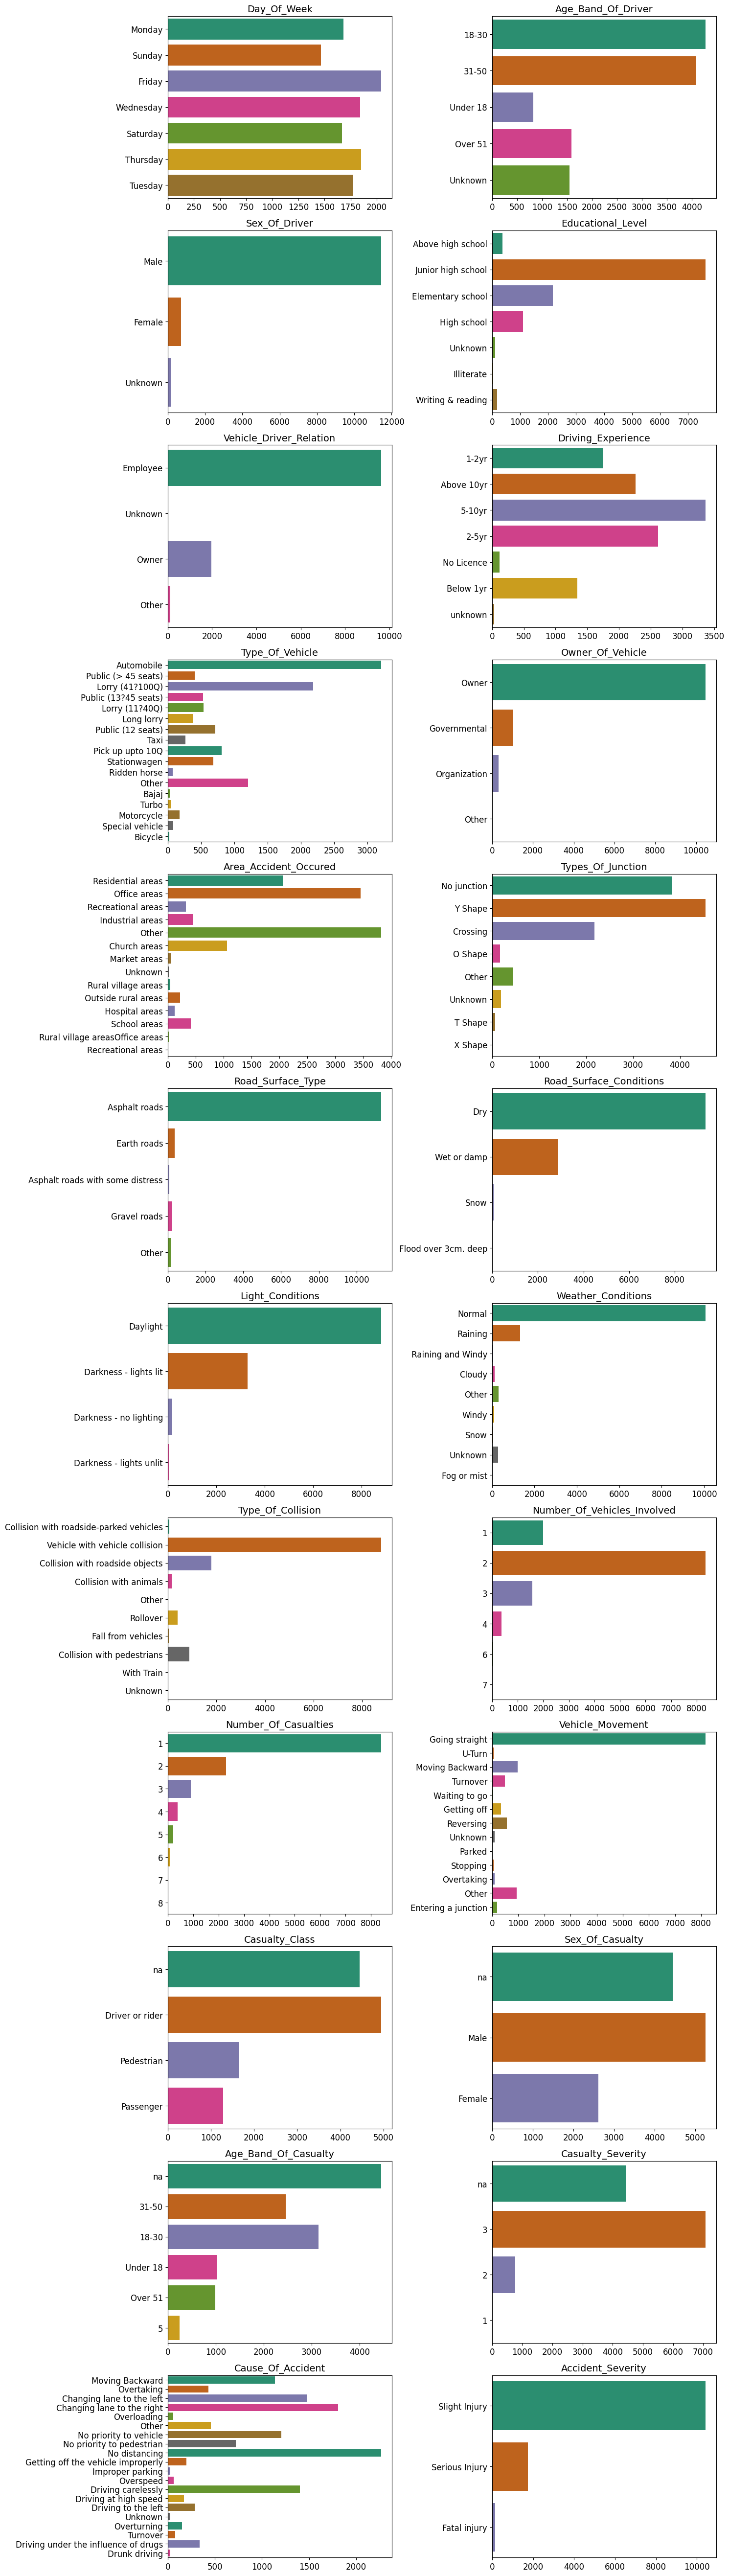

In [34]:

plt.figure(figsize=(15,70))
plotnumber = 1

for col in df.drop(['Lanes_or_Medians', 'Road_allignment', 'Pedestrian_movement','Time','hour','minute'], axis=1):
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data=df, y=col, palette='Dark2')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
plt.tight_layout()

<ipython-input-35-77d3c9fc8696>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Lanes_or_Medians', palette = 'Dark2')


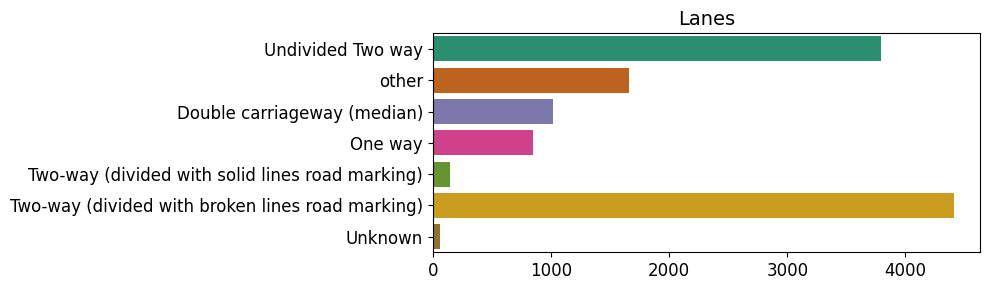

In [35]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='Lanes_or_Medians', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

<ipython-input-36-e64520a8d12d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Road_allignment', palette = 'Dark2')


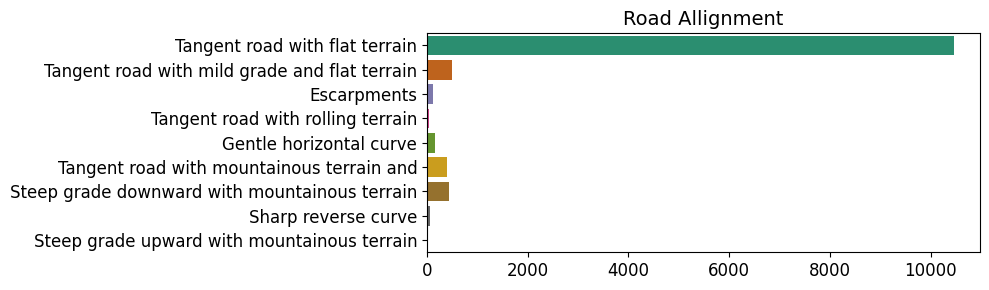

In [36]:
plt.figure(figsize=(10,3))
sns.countplot(data=df, y='Road_allignment', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Road Allignment', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [37]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Area_accident_occured,239


In [38]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [39]:
 df.duplicated().sum()

np.int64(0)

In [40]:
def fill_missing_values(df):
    # Fill missing numerical values with the median
    for col in df.select_dtypes(include=['float64', 'int64']):
        df.loc[:, col] = df[col].fillna(df[col].median())

    # Fill missing categorical values with the most frequent value (mode)
    for col in df.select_dtypes(include=['object']):
        df.loc[:, col] = df[col].fillna(df[col].mode()[0])

    print("Missing values handled successfully!")
    return df

In [41]:
 df = fill_missing_values(df)

Missing values handled successfully!


In [42]:
def handle_outliers(df, column):
    median_value = df[column].median()  # Compute the median value
    q1 = df[column].quantile(0.25)  # First quartile (25%)
    q3 = df[column].quantile(0.75)  # Third quartile (75%)
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr  # Lower bound for outliers
    upper_bound = q3 + 1.5 * iqr  # Upper bound for outliers

    # Replace outliers with the median value
    df.loc[:, column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), median_value, df[column])

    print(f"Outliers in {column} handled successfully!")
    return df

In [43]:
df = handle_outliers(df, 'Number_of_vehicles_involved')

Outliers in Number_of_vehicles_involved handled successfully!


In [44]:
df = handle_outliers(df, 'Number_of_casualties')

Outliers in Number_of_casualties handled successfully!


In [45]:
df['Time'] = pd.to_datetime(df['Time'], errors='coerce')

df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Time_of_Day'] = pd.cut(df['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

print(df[['Time', 'Hour', 'Minute', 'Time_of_Day']].head())

                 Time  Hour  Minute Time_of_Day
0 2025-04-02 17:02:00    17       2   Afternoon
1 2025-04-02 17:02:00    17       2   Afternoon
2 2025-04-02 17:02:00    17       2   Afternoon
3 2025-04-02 01:06:00     1       6       Night
4 2025-04-02 01:06:00     1       6       Night


<ipython-input-45-ec8557d84363>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'], errors='coerce')


In [46]:
def clean_text_columns(df):
    for col in df.select_dtypes(include=['object']):
        df.loc[:, col] = df[col].str.lower().str.strip()

    print("Text columns cleaned successfully!")
    return df

In [47]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Clean text: Remove extra spaces and convert to lowercase
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.strip().str.lower())

print("Text columns cleaned.")

Text columns cleaned.


In [48]:
df = clean_text_columns(df)

Text columns cleaned successfully!


In [49]:
def compute_statistics(df, total_accidents_before):
    total_accidents_after = len(df)  # Get the number of records after processing
    remaining_percentage = (total_accidents_after / total_accidents_before) * 100  # Compute percentage retained

    # Create a summary table
    stats = pd.DataFrame({
        'Dataset': ['RTA accident'],
        'Total Accidents Before': [total_accidents_before],
        'Total Accidents After': [total_accidents_after],
        'Remaining Percentage (%)': [f"{remaining_percentage:.2f}%"]
    })

    print("Dataset statistics computed successfully!")
    return stats

In [50]:
total_accidents_before = len(df)
stats = compute_statistics(df, total_accidents_before)  # Pass the initial length
print(stats)

Dataset statistics computed successfully!
        Dataset  Total Accidents Before  Total Accidents After  \
0  RTA accident                   12316                  12316   

  Remaining Percentage (%)  
0                  100.00%  


In [51]:
output_file = 'processed_RTA_Dataset.csv' # Define the output filename
df.to_csv(output_file, index=False, encoding='utf-8-sig')
print(f"Processed file saved successfully as {output_file}!")

Processed file saved successfully as processed_RTA_Dataset.csv!


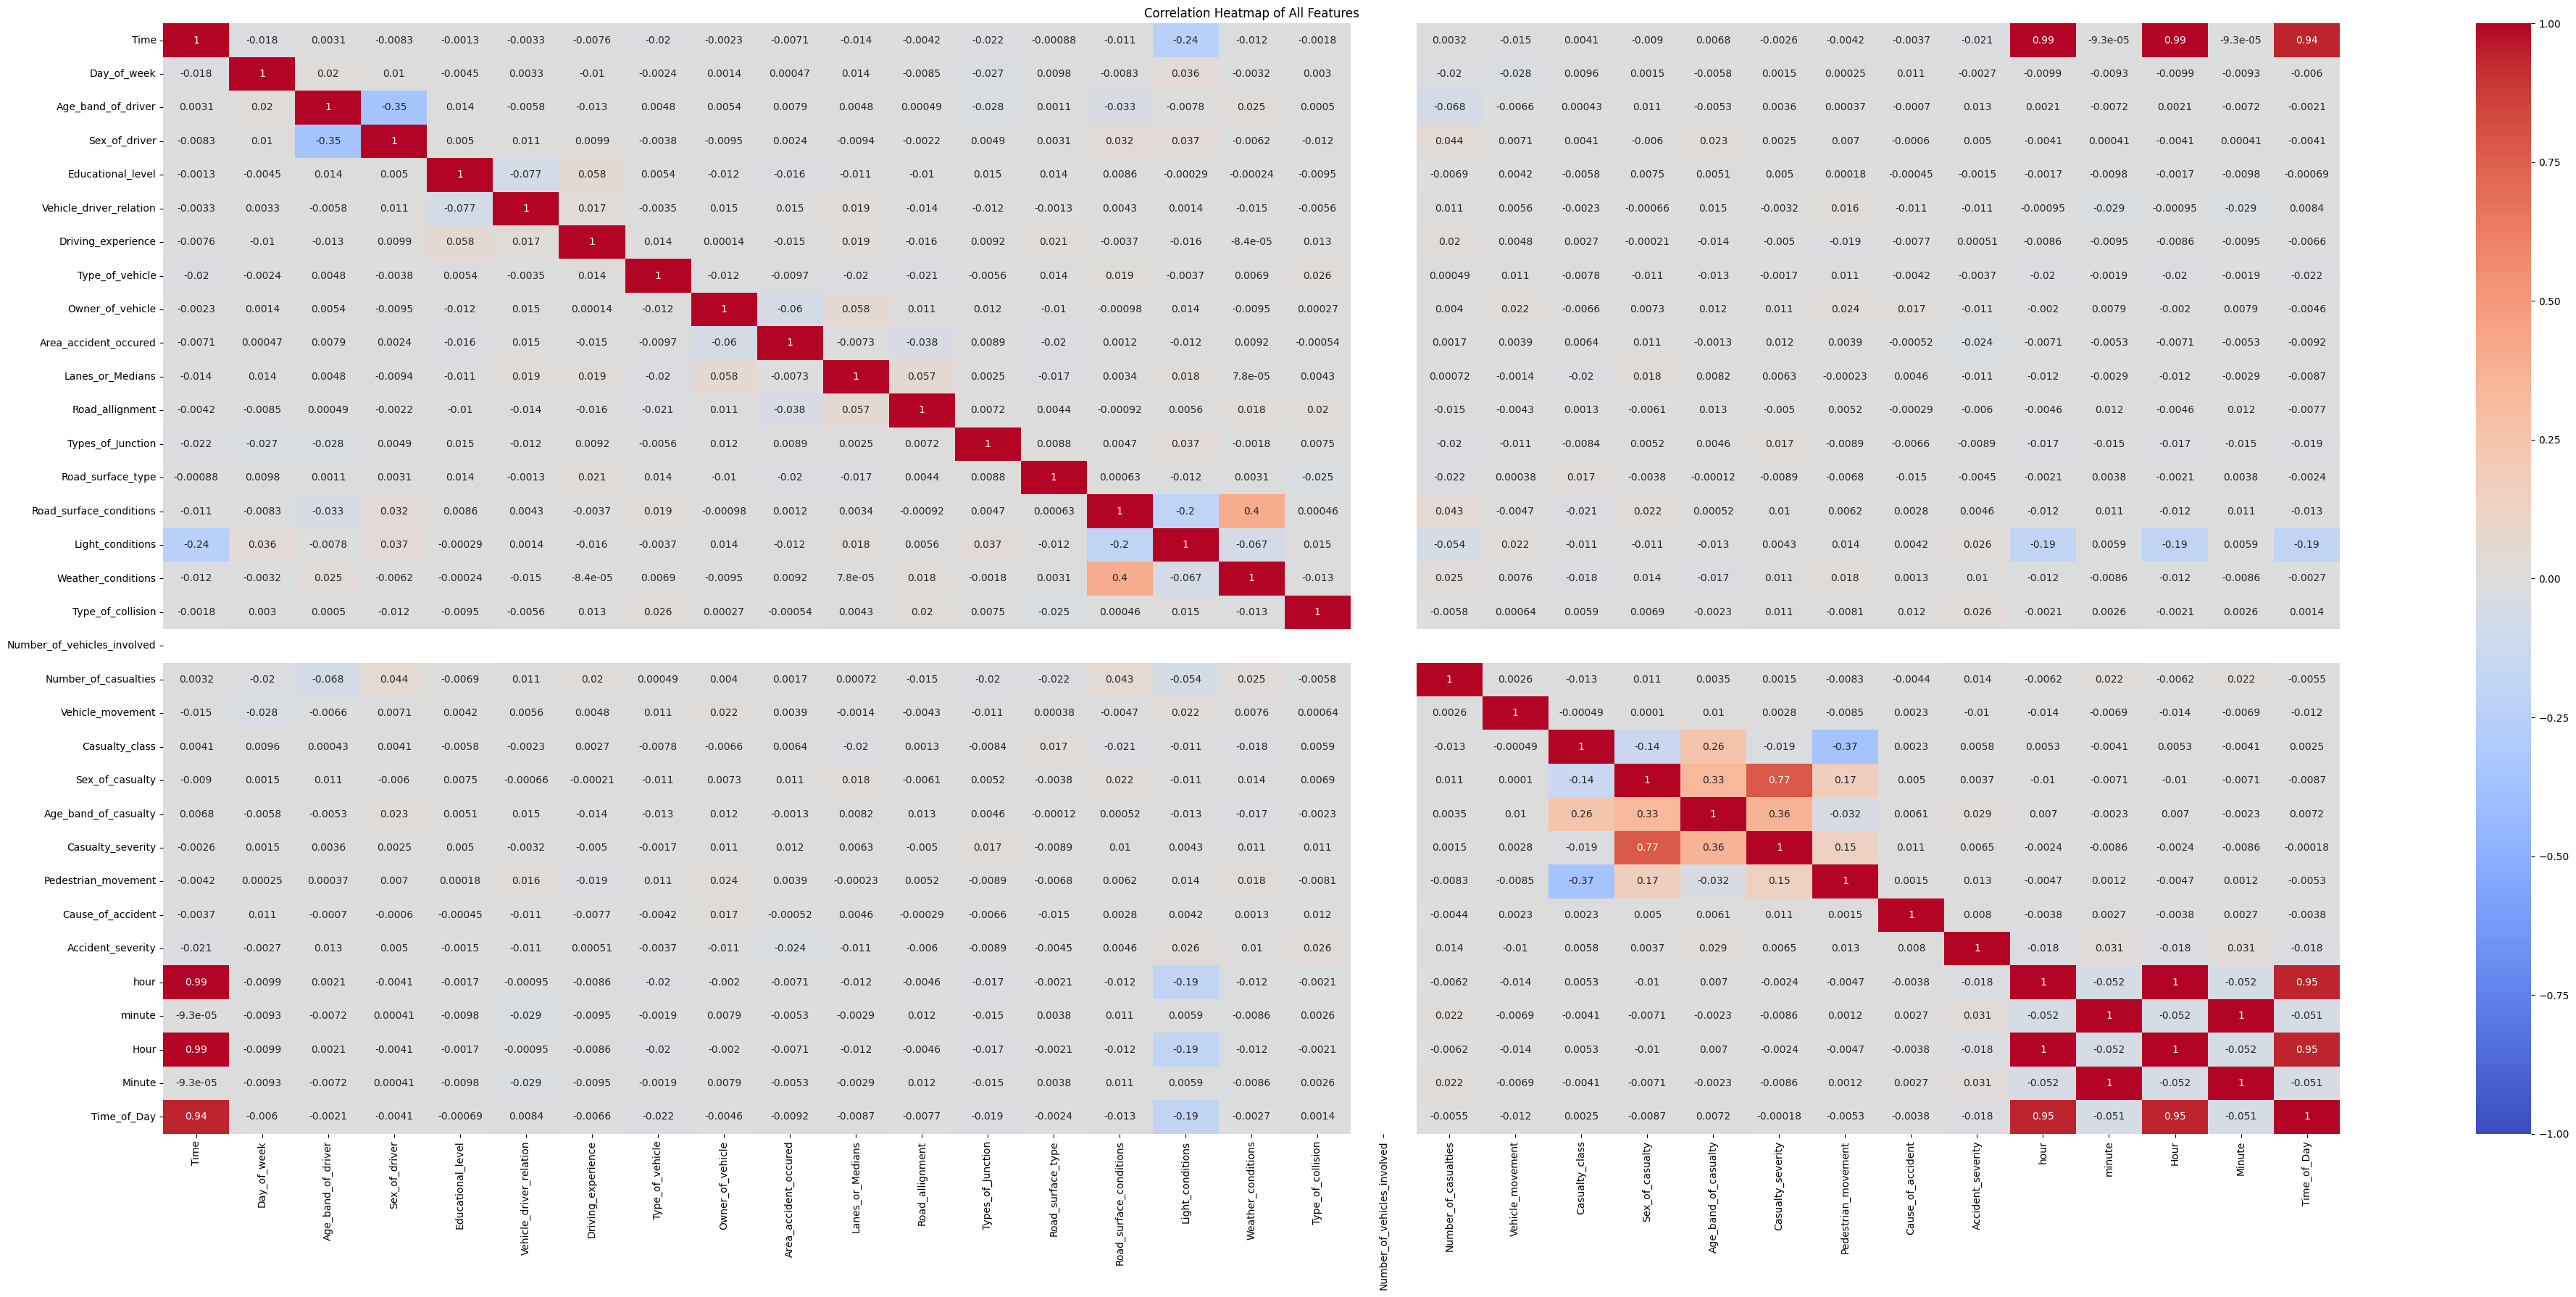

In [52]:
df_encoded = df.copy()
# Convert categorical features to numerical using encoding
for col in df_encoded.select_dtypes(exclude=np.number).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes
# Correlation heatmap for all features
plt.figure(figsize=(40, 18))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of All Features')
plt.tight_layout()
plt.show()

In [53]:
df["Accident_severity"].value_counts()

,count
Accident_severity,
slight injury,10415
serious injury,1743
fatal injury,158


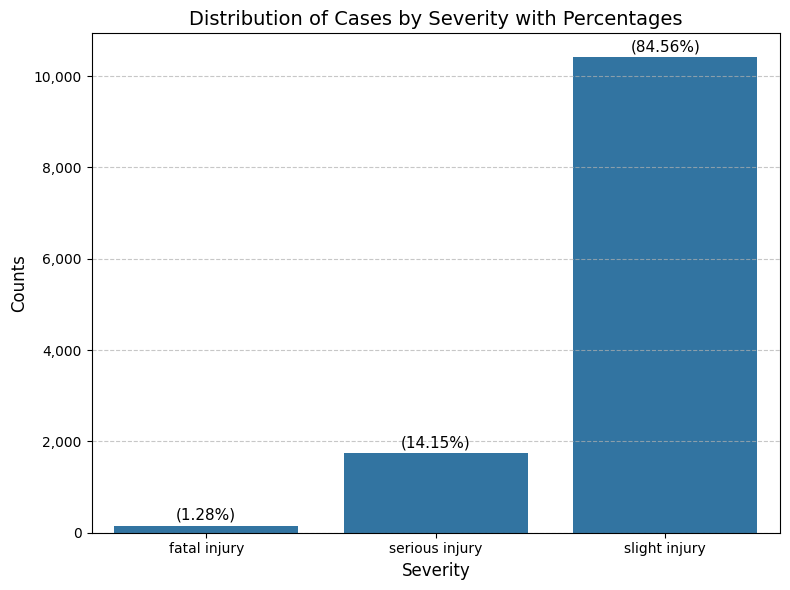

In [54]:
severity_counts = df["Accident_severity"].value_counts().sort_index()
total_cases = df.shape[0]
severity_percentages = (severity_counts / total_cases) * 100

severity_df = pd.DataFrame({
    'Severity': severity_counts.index,
    'Counts': severity_counts.values,
    'Percentage': severity_percentages.values
})

plt.figure(figsize=(8, 6))
sns.barplot(data=severity_df, x = "Severity", y="Counts")
for i, row in severity_df.iterrows():
    plt.text(i, row['Counts'] + total_cases * 0.01,
             f"({row['Percentage']:.2f}%)",
             ha='center', fontsize=11)

plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.title('Distribution of Cases by Severity with Percentages', fontsize=14)
plt.xlabel('Severity', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

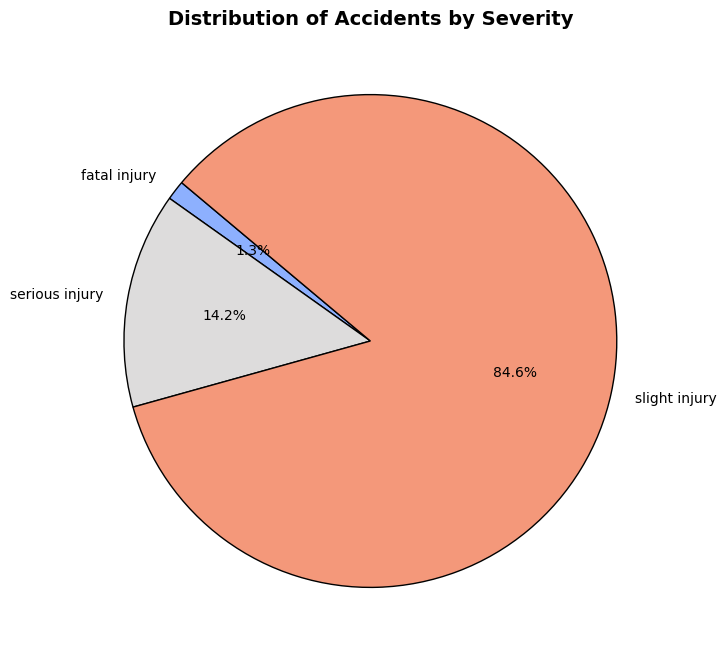

In [55]:
severity_counts = df["Accident_severity"].value_counts().sort_index()
severity_percentages = (severity_counts / severity_counts.sum()) * 100

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(severity_percentages, labels=severity_counts.index, autopct='%1.1f%%',
        colors=sns.color_palette("coolwarm", len(severity_counts)), startangle=140,
        wedgeprops={'edgecolor': 'black'})

# Add title
plt.title("Distribution of Accidents by Severity", fontsize=14, fontweight="bold")

# Show the plot
plt.show()

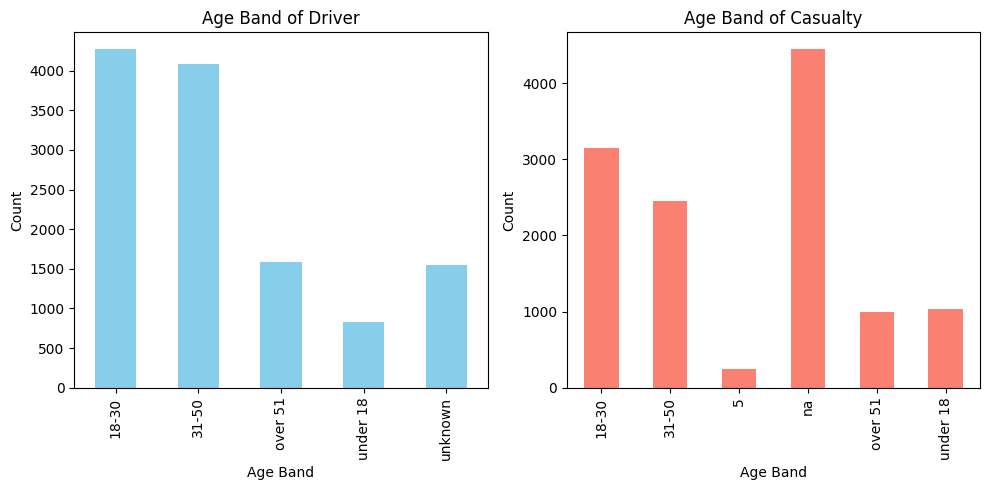

In [56]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
df['Age_band_of_driver'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Age Band of Driver')
plt.xlabel('Age Band')
plt.ylabel('Count')

# 绘制'Age_band_of_casualty'的条形图
plt.subplot(1, 2, 2)
df['Age_band_of_casualty'].value_counts().sort_index().plot(kind='bar', color='salmon')
plt.title('Age Band of Casualty')
plt.xlabel('Age Band')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [57]:
df['Number_of_casualties'].value_counts()

,count
Number_of_casualties,
1,9117
2,2290
3,909


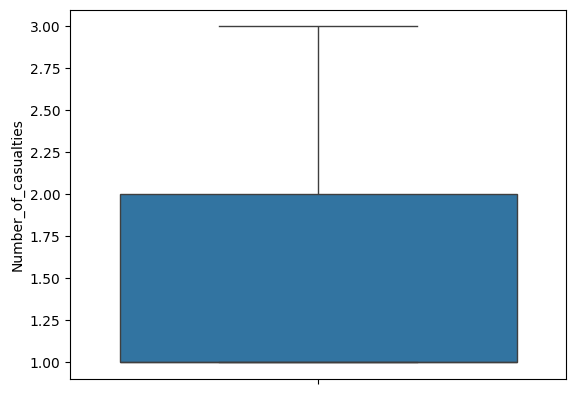

In [58]:
sns.boxplot(data=df, y='Number_of_casualties')
plt.show()

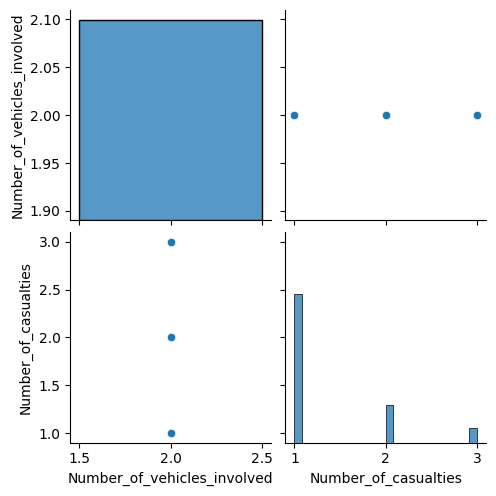

In [59]:
sns.pairplot(df[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

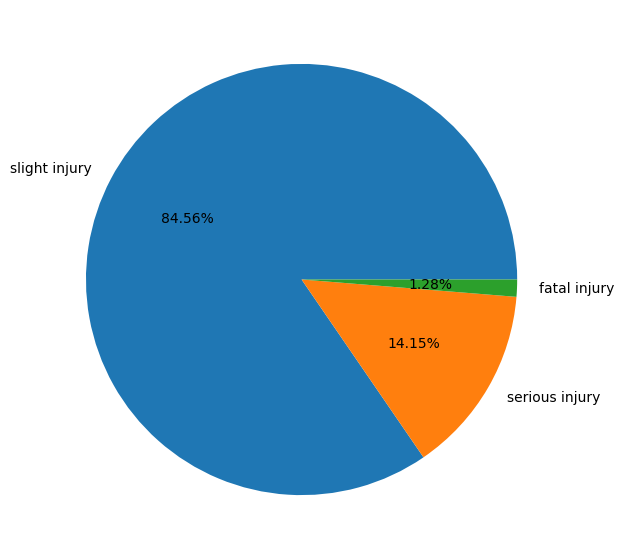

In [60]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Accident_severity'].value_counts().values,
        labels=df['Accident_severity'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

In [61]:
# dropping columns that can cause imbalance while imputation
# Check existing columns before dropping
existing_columns = df.columns

# Filter the list of columns to drop to only include those that exist
lists = [col for col in ['Vehicle_driver_relation', 'Day_of_week', 'Casualty_severity', 'Time', 'Sex_of_driver', 'Educational_level', 'Owner_of_vehicle', 'Road_surface_type', 'Sex_of_casualty'] if col in existing_columns]

# Drop the filtered columns
df.drop(columns=lists, inplace=True)

In [62]:
df.shape

(12316, 24)

In [63]:
df.columns

Index(['Age_band_of_driver', 'Driving_experience', 'Type_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_conditions', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Age_band_of_casualty',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity', 'hour',
       'minute', 'Hour', 'Minute', 'Time_of_Day'],
      dtype='object')

In [64]:
df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
df['Age_band_of_driver'].fillna(df['Age_band_of_driver'].mode()[0], inplace=True)
df['Type_of_vehicle'].fillna(df['Type_of_vehicle'].mode()[0], inplace=True)
df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0], inplace=True)
df['Road_allignment'].fillna(df['Road_allignment'].mode()[0], inplace=True)
df['Type_of_collision'].fillna(df['Type_of_collision'].mode()[0], inplace=True)
df['Vehicle_movement'].fillna(df['Vehicle_movement'].mode()[0], inplace=True)
df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0], inplace=True)

<ipython-input-64-fc812eba0401>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Driving_experience'].fillna(df['Driving_experience'].mode()[0], inplace=True)
<ipython-input-64-fc812eba0401>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [65]:
df.isnull().sum()

,0
Age_band_of_driver,0
Driving_experience,0
Type_of_vehicle,0
Area_accident_occured,0
Lanes_or_Medians,0
Road_allignment,0
Types_of_Junction,0
Road_surface_conditions,0
Light_conditions,0
Weather_conditions,0


<ipython-input-66-2f489eec5aef>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Class 0:', target_count[0])
<ipython-input-66-2f489eec5aef>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Class 1:', target_count[1])
<ipython-input-66-2f489eec5aef>:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')


Class 0: 10415
Class 1: 1743
Proportion: 5.98 : 1


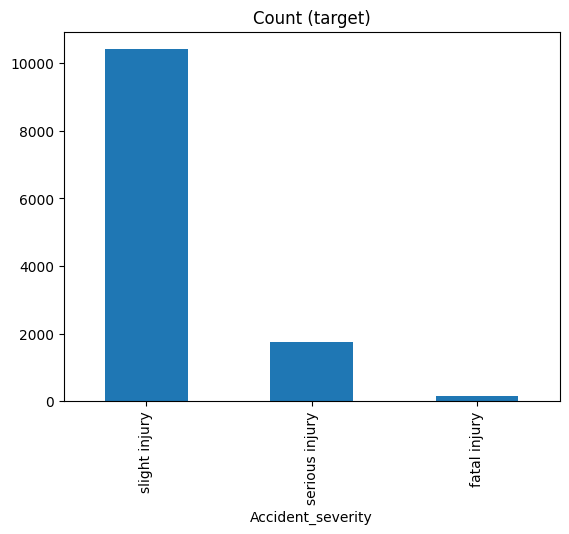

In [66]:
target_count = df['Accident_severity'].value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [67]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df=df.apply(LE.fit_transform)

<Axes: >

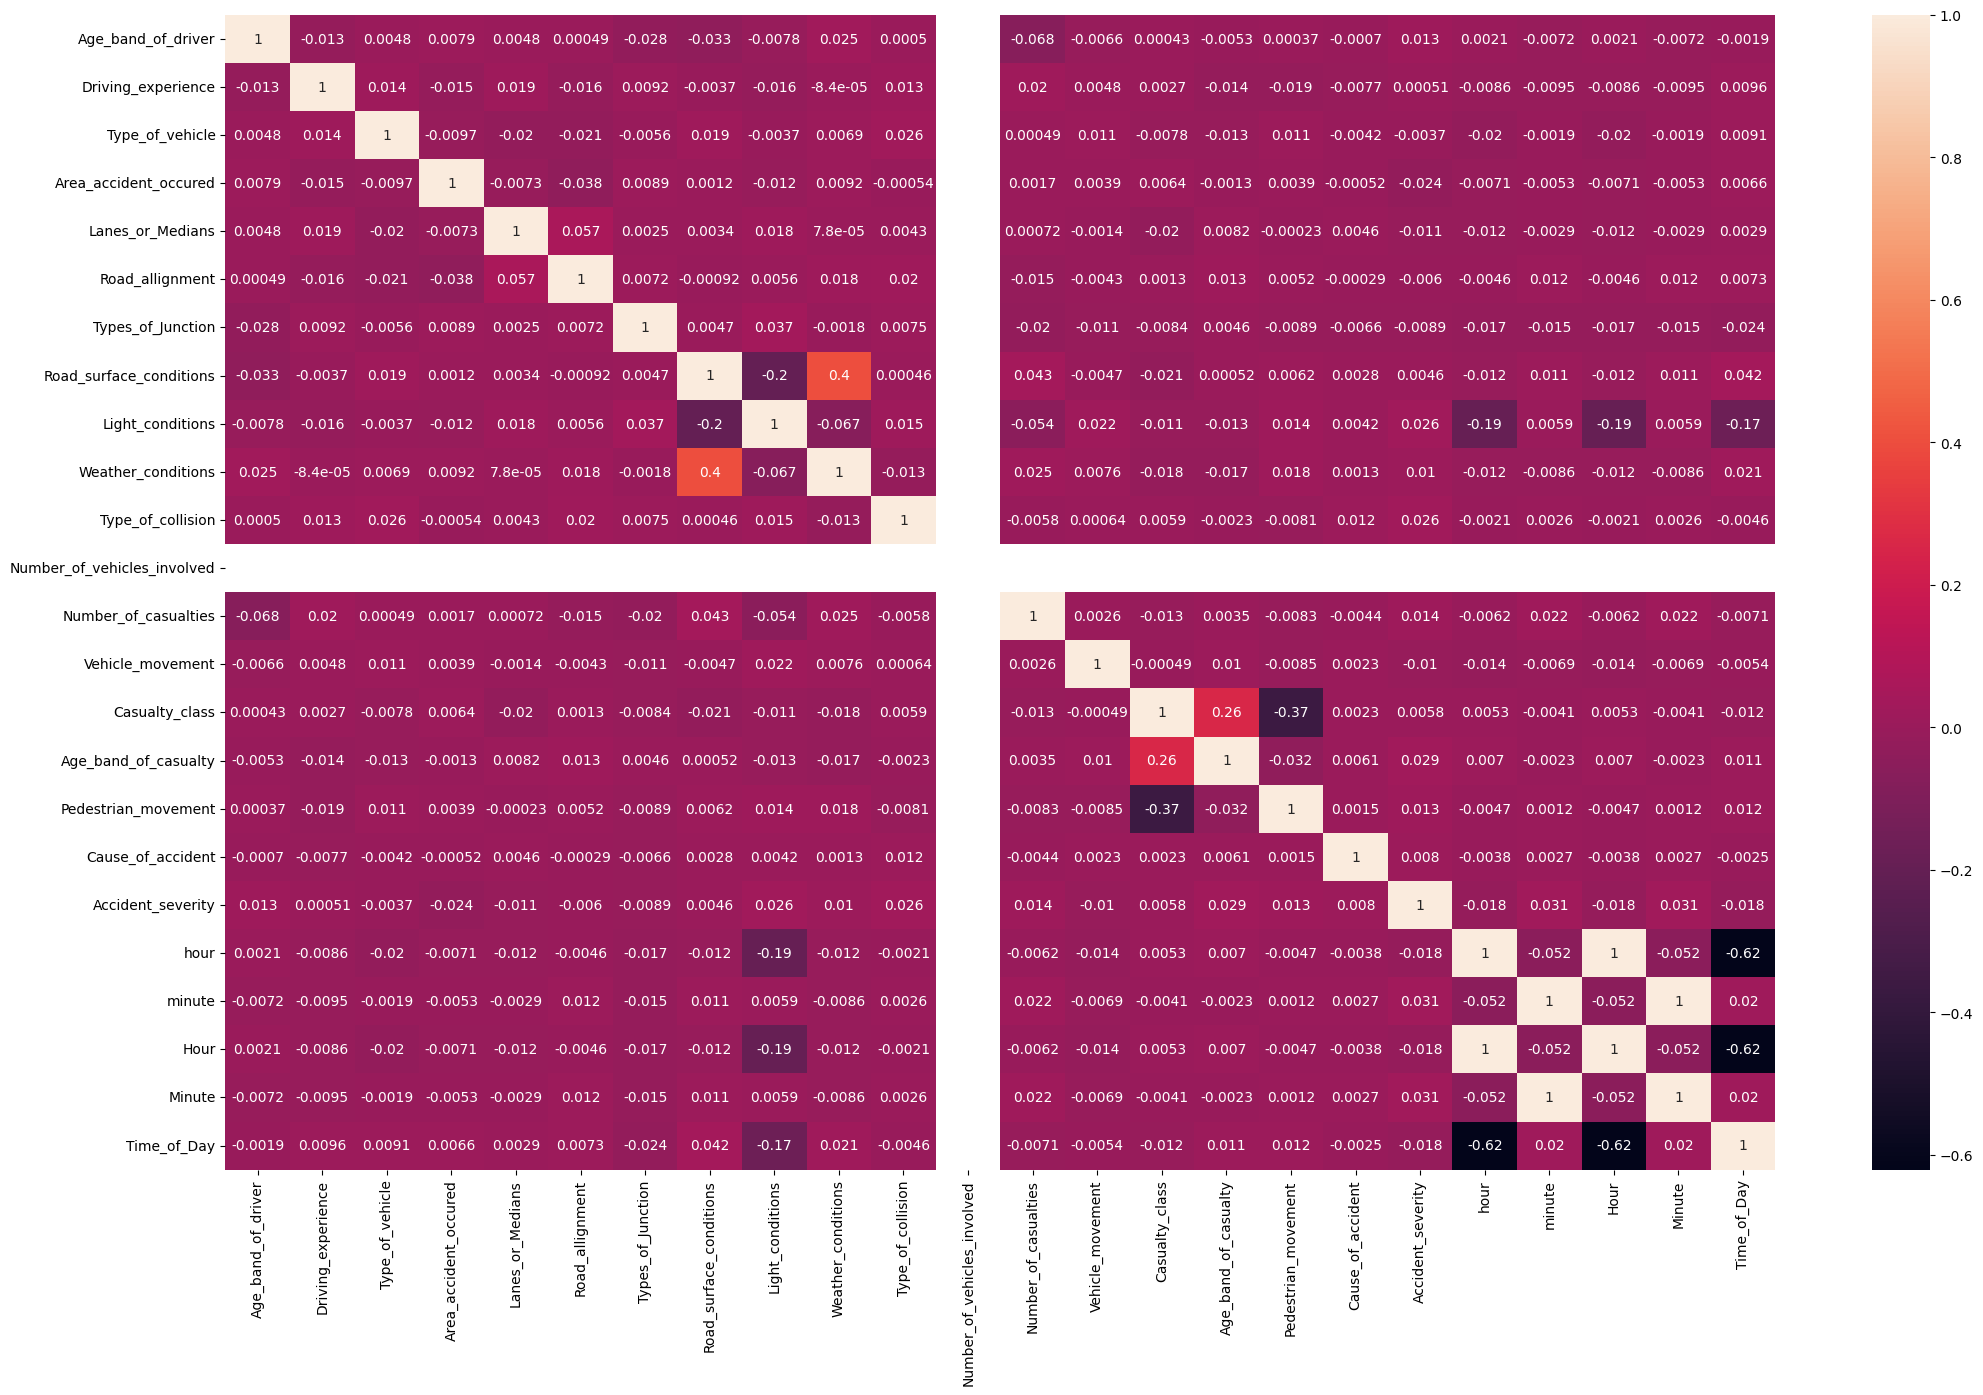

In [68]:
plt.figure(figsize=[25,15])
sns.heatmap(df.corr(),annot=True)

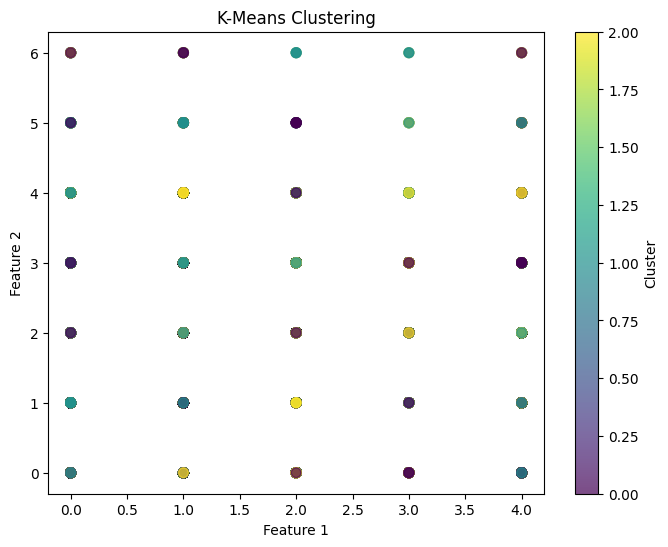

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
import numpy as np

X = df.copy()
X_numerical = X.select_dtypes(include=np.number)

categorical_features = X.select_dtypes(exclude=np.number).columns
if len(categorical_features) > 0:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded_data = encoder.fit_transform(X[categorical_features])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features), index=X.index)
    X_numerical = pd.concat([X_numerical, encoded_df], axis=1)


kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
df['Cluster'] = kmeans.fit_predict(X_numerical)

plt.figure(figsize=(8, 6))
plt.scatter(X_numerical.iloc[:, 0], X_numerical.iloc[:, 1], c=df['Cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [70]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()

In [71]:
from sklearn.model_selection import train_test_split # Import the train_test_split function
x = df.drop('Accident_severity', axis=1)
y = df['Accident_severity']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=42)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(8621, 24) (3695, 24) (8621,) (3695,)


In [72]:
from collections import Counter

counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")



!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
xtrain, ytrain = oversample.fit_resample(xtrain, ytrain)



counter = Counter(ytrain)

print("=============================")

for k,v in counter.items():
    per = 100*v/len(ytrain)
    print(f"Class= {k}, n={v} ({per:.2f}%)")

print("=============================")

print("Upsampled data shape: ", xtrain.shape, ytrain.shape)


Class= 2, n=7324 (84.96%)
Class= 1, n=1191 (13.82%)
Class= 0, n=106 (1.23%)
Class= 2, n=7324 (33.33%)
Class= 1, n=7324 (33.33%)
Class= 0, n=7324 (33.33%)
Upsampled data shape:  (21972, 24) (21972,)


## LogisticRegression

In [73]:
x=df.drop(columns=["Accident_severity"])
y=df["Accident_severity"]

In [74]:
# Import the necessary class
from sklearn.linear_model import LogisticRegression

# Now you can create and use the LogisticRegression object
model = LogisticRegression(max_iter=1000)
model.fit(xtrain, ytrain)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [75]:
# Add this line to import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

ypred = model.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(ytest, ypred)
print("Classification Matrix:")
print(conf_matrix)

print(classification_report(ytest, ypred))

Accuracy: 0.52
Classification Matrix:
[[  19    7   26]
 [ 119  140  293]
 [ 624  700 1767]]
              precision    recall  f1-score   support

           0       0.02      0.37      0.05        52
           1       0.17      0.25      0.20       552
           2       0.85      0.57      0.68      3091

    accuracy                           0.52      3695
   macro avg       0.35      0.40      0.31      3695
weighted avg       0.73      0.52      0.60      3695



#Decision Tree classifier

In [76]:
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier

model = DecisionTreeClassifier() # Now you can use DecisionTreeClassifier
model.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [77]:
ypred = model.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(ytest, ypred)
print("Classification Matrix:")
print(conf_matrix)

print(classification_report(ytest, ypred))

Accuracy: 0.68
Classification Matrix:
[[   7   10   35]
 [  17  161  374]
 [  75  683 2333]]
              precision    recall  f1-score   support

           0       0.07      0.13      0.09        52
           1       0.19      0.29      0.23       552
           2       0.85      0.75      0.80      3091

    accuracy                           0.68      3695
   macro avg       0.37      0.39      0.37      3695
weighted avg       0.74      0.68      0.70      3695



# SVM

In [78]:
# Import the SVC class from sklearn.svm
from sklearn.svm import SVC

# Now you can use SVC to create a model
model = SVC()
model.fit(xtrain, ytrain)

SVC()

In [79]:
ypred = model.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(ytest, ypred)
print("Classification Matrix:")
print(conf_matrix)

print(classification_report(ytest, ypred))


Accuracy: 0.50
Classification Matrix:
[[  12   12   28]
 [ 112  152  288]
 [ 574  845 1672]]
              precision    recall  f1-score   support

           0       0.02      0.23      0.03        52
           1       0.15      0.28      0.19       552
           2       0.84      0.54      0.66      3091

    accuracy                           0.50      3695
   macro avg       0.34      0.35      0.30      3695
weighted avg       0.73      0.50      0.58      3695



#KNeighborsClassifier

In [80]:
model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors)
model.fit(xtrain, ytrain)

KNeighborsClassifier()

In [81]:
ypred = model.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display the classification matrix
conf_matrix = confusion_matrix(ytest, ypred)
print("Classification Matrix:")
print(conf_matrix)

# Print classification report for precision, recall, F1-score
print(classification_report(ytest, ypred))

Accuracy: 0.52
Classification Matrix:
[[  16   12   24]
 [  66  240  246]
 [ 326 1118 1647]]
              precision    recall  f1-score   support

           0       0.04      0.31      0.07        52
           1       0.18      0.43      0.25       552
           2       0.86      0.53      0.66      3091

    accuracy                           0.52      3695
   macro avg       0.36      0.43      0.33      3695
weighted avg       0.75      0.52      0.59      3695



#RandomForestClassifier

In [82]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

RandomForestClassifier()

In [83]:
# Make predictions on the test set
ypred = model.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display the classification matrix
conf_matrix = confusion_matrix(ytest, ypred)
print("Classification Matrix:")
print(conf_matrix)

# Print classification report for precision, recall, F1-score
print(classification_report(ytest, ypred))

Accuracy: 0.80
Classification Matrix:
[[   2    2   48]
 [   1   65  486]
 [   4  185 2902]]
              precision    recall  f1-score   support

           0       0.29      0.04      0.07        52
           1       0.26      0.12      0.16       552
           2       0.84      0.94      0.89      3091

    accuracy                           0.80      3695
   macro avg       0.46      0.37      0.37      3695
weighted avg       0.75      0.80      0.77      3695



#AdaBoostClassifier

In [84]:
model = AdaBoostClassifier()
model.fit(xtrain, ytrain)

AdaBoostClassifier()

In [85]:

ypred = model.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(ytest, ypred)
print("Classification Matrix:")
print(conf_matrix)

print(classification_report(ytest, ypred))

Accuracy: 0.50
Classification Matrix:
[[  15   11   26]
 [ 116  162  274]
 [ 493  924 1674]]
              precision    recall  f1-score   support

           0       0.02      0.29      0.04        52
           1       0.15      0.29      0.20       552
           2       0.85      0.54      0.66      3091

    accuracy                           0.50      3695
   macro avg       0.34      0.37      0.30      3695
weighted avg       0.73      0.50      0.58      3695



# GradientBoostingClassifier

In [86]:
model = GradientBoostingClassifier()
model.fit(xtrain, ytrain)

GradientBoostingClassifier()

In [87]:

ypred = model.predict(xtest)

accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.2f}")

conf_matrix = confusion_matrix(ytest, ypred)
print("Classification Matrix:")
print(conf_matrix)

print(classification_report(ytest, ypred))

Accuracy: 0.70
Classification Matrix:
[[   8    1   43]
 [  27  115  410]
 [ 149  492 2450]]
              precision    recall  f1-score   support

           0       0.04      0.15      0.07        52
           1       0.19      0.21      0.20       552
           2       0.84      0.79      0.82      3091

    accuracy                           0.70      3695
   macro avg       0.36      0.38      0.36      3695
weighted avg       0.73      0.70      0.71      3695



# ExtraTreesClassifier

In [88]:
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(xtrain, ytrain)

ExtraTreesClassifier(random_state=42)

In [89]:
y_pred = model.predict(xtest)

In [90]:
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display the classification matrix
conf_matrix = confusion_matrix(ytest, y_pred)
print("\nClassification Matrix:")
print(conf_matrix)

# Print the classification report
class_report = classification_report(ytest, y_pred)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.81

Classification Matrix:
[[   2    2   48]
 [   1   50  501]
 [   1  134 2956]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        52
           1       0.27      0.09      0.14       552
           2       0.84      0.96      0.90      3091

    accuracy                           0.81      3695
   macro avg       0.54      0.36      0.37      3695
weighted avg       0.75      0.81      0.77      3695



#GaussianNB

In [91]:
model = GaussianNB()
model.fit(xtrain, ytrain)

GaussianNB()

In [92]:
# Make predictions on the test set
ypred = model.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, ypred)
print(f"Accuracy: {accuracy:.2f}")

# Generate and display the classification matrix
conf_matrix = confusion_matrix(ytest, ypred)
print("Classification Matrix:")
print(conf_matrix)

# Print classification report for precision, recall, F1-score
print(classification_report(ytest, ypred))


Accuracy: 0.47
Classification Matrix:
[[  18    9   25]
 [ 135  164  253]
 [ 752  784 1555]]
              precision    recall  f1-score   support

           0       0.02      0.35      0.04        52
           1       0.17      0.30      0.22       552
           2       0.85      0.50      0.63      3091

    accuracy                           0.47      3695
   macro avg       0.35      0.38      0.30      3695
weighted avg       0.74      0.47      0.56      3695



In [93]:
def bestModel(result):
    high=0
    for name,acc in result.items():
        if acc>high:
            high=acc
            model_name=name
    print("Best Model is ",model_name," with accuaracy =>",high)

In [94]:
def bestParams(model,param,xtrain,ytrain):
    #cv
    cv=RepeatedStratifiedKFold(n_splits=5,n_repeats=3)
    grid_cv=GridSearchCV(estimator=model,param_grid=param,cv=cv,scoring="f1_weighted")
    res=grid_cv.fit(xtrain,ytrain)
    print("Best Parameters are ",res.best_params_)
    print("Best Accuracy is ",res.best_score_)

In [95]:
bestParams

<function __main__.bestParams(model, param, xtrain, ytrain)>

In [96]:
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

def plt_auc(ytest,ypred_proba):
    # roc curve for classes
    fpr = {}
    tpr = {}
    thresh ={}

    n_class = 3

    for i in range(n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(ytest, ypred_proba[:,i], pos_label=i)

    # plotting
    plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
    plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
    plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
    plt.title('Multiclass ROC curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')
    plt.legend(loc='best')
    plt.savefig('Multiclass ROC',dpi=300);


# models,x,y,scaleFlag=0,1,2
def modelAccuracy(models,x,y,scaleFlag):
    #train/Test
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
    acc_result={}
    for name,model in models.items():
        #pipeline
        #1.Transformer -> 2.Model
        print("============================",name,"================================")
        if(scaleFlag==1):
            model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
        elif(scaleFlag==2):
             model_pipeline=Pipeline([('StandardScaler',StandardScaler()),('model',model)])
        else:
            model_pipeline=Pipeline([('model',model)])
        #training/testing on model pipeline
        model_fit=model_pipeline.fit(xtrain,ytrain)
        ypred=model_fit.predict(xtest)
        ypred_proba=model_fit.predict_proba(xtest)

        # Handle NaN values in ypred_proba
        ypred_proba = np.nan_to_num(ypred_proba, nan=1/3)

        print(classification_report(ytest,ypred))
        auc =  roc_auc_score(ytest, ypred_proba, multi_class='ovr', average='macro')
        print("macro-AUC:",auc)
        auc =  roc_auc_score(ytest, ypred_proba, multi_class='ovr', average='weighted')
        print("weighted-AUC:",auc,"\n")
        plt_auc(ytest,ypred_proba)
    return acc_result # Returning the dictionary

In [97]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.multiclass import OneVsRestClassifier # Import OneVsRestClassifier

model = OneVsRestClassifier(GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5))
model_pipeline=Pipeline([('MinMaxScler',MinMaxScaler()),('model',model)])
model_fit=model_pipeline.fit(xtrain,ytrain)
ypred=model_fit.predict(xtest)
ypred_proba=model_fit.predict_proba(xtest)
auc =  roc_auc_score(ytest, ypred_proba, multi_class='ovr', average='macro')
print("The AUC is :",auc)

The AUC is : 0.6106578525645745


In [98]:
from sklearn.linear_model import HuberRegressor
huber = HuberRegressor()
huber.fit(xtrain, ytrain)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_huber.py:343: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


HuberRegressor()

In [99]:
from sklearn.preprocessing import LabelEncoder
# Assuming 'df' is your original DataFrame

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X = df.drop('Accident_severity', axis=1)  # Features (excluding the target variable)
y = df['Accident_severity']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you have X_train and y_train, and you can proceed with your code
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a LabelEncoder object
encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_cols:
    X_train[col] = encoder.fit_transform(X_train[col])
    # Convert the encoded column to numeric type
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')  # Add this line to convert the encoded column to numeric type

# Convert all columns to numeric, handling errors by setting non-numeric values to NaN
# This step ensures all columns used in quantile calculation are numeric
for col in X_train.columns:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

# Now proceed with calculating quantiles
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and remove outliers
is_outlier = ~((X_train < lower_bound) | (X_train > upper_bound)).any(axis=1)
X_train_cleaned = X_train[is_outlier]
y_train_cleaned = y_train[is_outlier]

print(f"Original training set shape: {X_train.shape}, {y_train.shape}")
print(f"Cleaned training set shape: {X_train_cleaned.shape}, {y_train_cleaned.shape}")

Original training set shape: (8621, 24), (8621,)
Cleaned training set shape: (2698, 24), (2698,)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


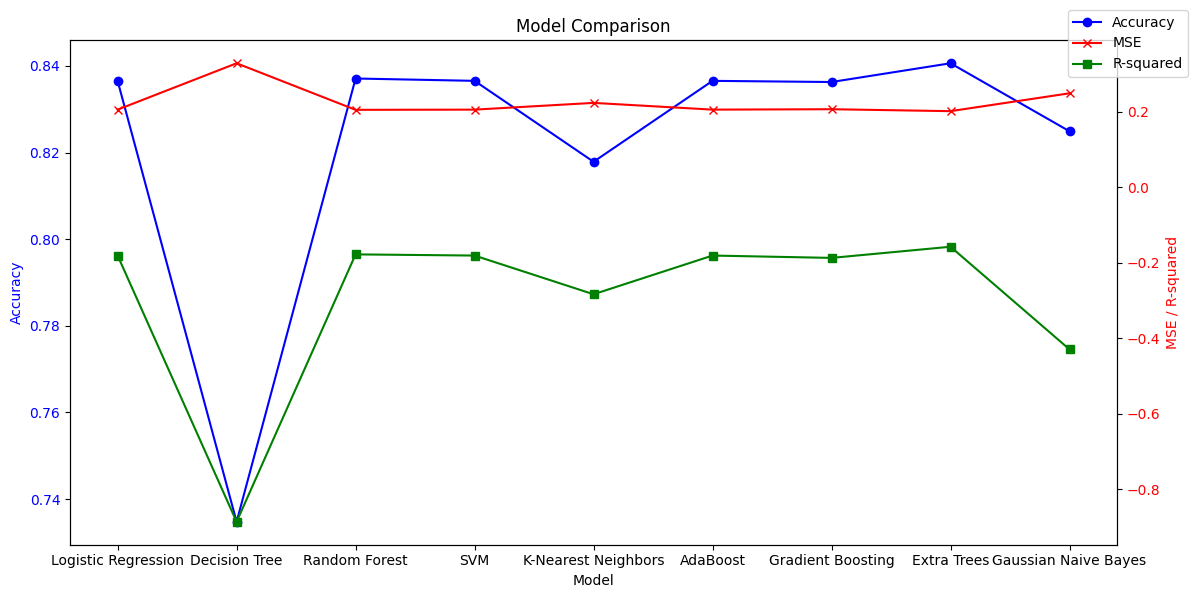

In [100]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score # Import mean_squared_error and r2_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Extra Trees": ExtraTreesClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
}

# Assuming you already have X_train, X_test, y_train, y_test from your data splitting

results = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append([model_name, accuracy, mse, r2])


results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "MSE", "R-squared"])

fig, ax1 = plt.subplots(figsize=(12, 6))


ax1.plot(results_df["Model"], results_df["Accuracy"], marker="o", label="Accuracy", color="blue")
ax1.set_xlabel("Model")
ax1.set_ylabel("Accuracy", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(results_df["Model"], results_df["MSE"], marker="x", label="MSE", color="red")
ax2.plot(results_df["Model"], results_df["R-squared"], marker="s", label="R-squared", color="green")
ax2.set_ylabel("MSE / R-squared", color="red")
ax2.tick_params(axis="y", labelcolor="red")

plt.title("Model Comparison")
plt.xticks(rotation=45, ha="right")
fig.legend(loc="upper right", bbox_to_anchor=(1, 1))  # Adjust legend position if needed
plt.tight_layout()
plt.show()

In [101]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 76.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.7 MB/s eta 0:00:00


In [106]:
import pickle

# Assuming 'model' is your trained ExtraTreesClassifier
with open('trained_model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved as trained_model.pkl")

Model saved as trained_model.pkl


In [125]:
import streamlit as st
import pickle
import pandas as pd

# Load the trained model
with open('trained_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Load the original data for feature information (if available)
try:
    original_data = pd.read_csv('RTA Dataset.csv')
except FileNotFoundError:
    st.warning('Original data file ("RTA Dataset.csv") not found. '
               'Some feature information might be missing.')
    original_data = None

# App title
st.title('Accident Severity Prediction')

# Input fields for features
input_data = {}
for feature in model.feature_names_in_:
    # Get feature type from original data (if available)
    feature_type = original_data[feature].dtype if original_data is not None and feature in original_data else None

    if feature_type == 'object':  # Categorical feature
        options = original_data[feature].unique() if original_data is not None else ['Unknown']
        input_data[feature] = st.selectbox(feature, options)
    else:  # Numerical feature
        # Handle 'hour' feature separately (assuming it's within the range 0-23)
        if feature == 'hour':
            min_val, max_val = 0, 23
        else:
            min_val = original_data[feature].min() if original_data is not None and feature in original_data else 0
            max_val = original_data[feature].max() if original_data is not None and feature in original_data else 100
        input_data[feature] = st.number_input(feature, min_value=min_val, max_value=max_val)

# Prediction button
if st.button('Predict'):
    # Create input DataFrame
    input_df = pd.DataFrame([input_data])

    # Make prediction
    prediction = model.predict(input_df)[0]
    st.success(f'Predicted Accident Severity: {prediction}')

2025-04-02 12:30:19.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:30:19.494 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:30:19.505 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:30:19.508 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:30:19.511 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:30:19.513 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:30:19.516 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-02 12:30:19.518 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [126]:
!wget -q -O - ipv4.icanhazip.com

35.240.239.226


In [127]:
! streamlit run app.py & npx localtunnel --port 8501

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py
⠙⠹⠸⠼⠴your url is: https://silly-hairs-wink.loca.lt
^C
